# Envio de Correos con Python
----------------------

En este tutorial aprenderemos a:
 - generar una conexión segura para el envio de correos desde Gmail
 - Enviar correos básicos desde la librería </code>smtplib</code>
 - Enviar correos con contenido HTML y adjuntar documentos
 - Enviar correos personalizados utilizando archivos csv o excels

## 1. Configuración Inicial

Python viene con el módulo smtplib incorporado para enviar correos electrónicos usando el Protocolo simple de transferencia de correo (SMTP). smtplib utiliza el protocolo RFC 821 para SMTP. Los ejemplos de este tutorial utilizarán el servidor SMTP de Gmail para enviar correos electrónicos, pero los mismos principios se aplican a otros servicios de correo electrónico. Aunque la mayoría de los proveedores de correo electrónico utilizan los mismos puertos de conexión que los de este tutorial, puede ejecutar una búsqueda rápida en Google para confirmar el suyo.

### - Configurando token de seguridad de Gmail

Para poder obtener nuestro token de desarrollador de aplicación debemos hacer lo siguiente:

<ul>
<li><a href="https://accounts.google.com/signup">Crear una cuenta de Gmail</a>.</li>
<li><a href="https://myaccount.google.com/lesssecureapps"><em>Permitir apps menos seguras</em> to <em>ON</em></a>. Debes tener cuidado que esta opción pueda facilitar el acceso a personas ajenas a tu cuenta. </li>
</ul>

Si no se desea utilizar el token de desarrollor puedes leer la [documetación de google](https://developers.google.com/gmail/api/quickstart/python) para tener credenciales para python


## 2. Servidores y Puertos

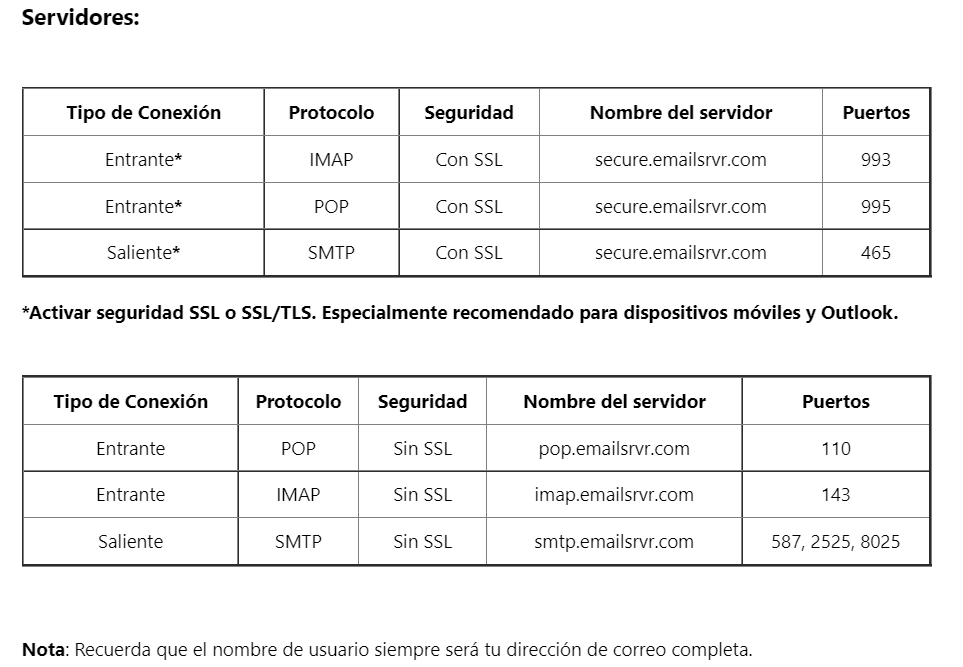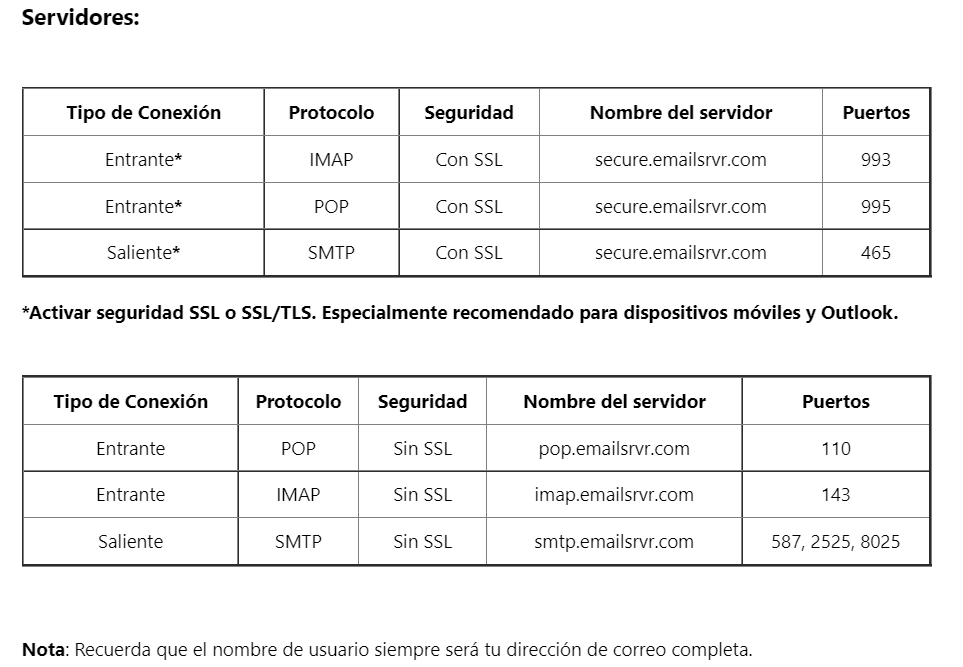<img src="./img/correo/servidores.png">

## 3. Conectandonos a Gmail

Inicializaremos una conexión segura a gmail utilizando <code>SMTP_SSL</code> el cual genera una conexión TLS-encrypted. la libería ssl comprobará la seguridad del servidor utilizado desde el inición de la conexión

Adicional a ello el token generado por gmail lo ocultamos en las variables de entorno del sistema de Windows para tener una mayor proteccion

### - Validando Conexión

In [5]:
import smtplib, ssl
import os

smtp_server = "smtp.gmail.com" # servidor de correo
port = 465  # For SSL
sender_email = "gon2794@gmail.com" # mi correo
password = 'uklpfbunnxfxcggz' #os.environ.get('GmailToken') # mi contraseña de correo o token

# Create a secure SSL context
context = ssl.create_default_context()

with smtplib.SMTP_SSL(smtp_server, port, context=context) as server:
    server.login(sender_email, password)
    
    # TODO: Send email here
    print("OK")
    

SMTPAuthenticationError: (535, b'5.7.8 Username and Password not accepted. Learn more at\n5.7.8  https://support.google.com/mail/?p=BadCredentials h1sm4399878oog.26 - gsmtp')

### - Enviando correo básico

Para esto usaremos 

<code>server.sendmail(sender_email, receiver_email, message)</code>

In [2]:
import smtplib, ssl
import os

smtp_server = "smtp.gmail.com" # servidor de correo
port = 465  # For SSL
sender_email = "gon2794@gmail.com" # mi correo
password = 'uklpfbunnxfxcggz' #os.environ.get('GmailToken') # mi contraseña de correo o token
receiver_email = "gonzalo.delgado.r@uni.pe"  # Enter receiver address

message = """\
Subject: Hi there

This message is sent from Python."""

# Create a secure SSL context
context = ssl.create_default_context()

with smtplib.SMTP_SSL(smtp_server, port, context=context) as server:
    server.login(sender_email, password)
    
    # TODO: Send email here
    server.sendmail(sender_email, receiver_email, message)
    
print("Finalizado ... ")

Finalizado ... 


### - Enviando correo con formato HTML

Para poder dar formato a nuestro cuerpo de correo se podrá realizar por médio de código html

Como no todos los clientes de correo electrónico muestran contenido HTML de forma predeterminada, y algunas personas eligen recibir solo mensajes de texto sin formato por razones de seguridad, es importante incluir una alternativa de texto sin formato para los mensajes HTML. Como el cliente de correo electrónico representará primero el último archivo adjunto de varias partes, asegúrese de agregar el mensaje HTML después de la versión de texto sin formato.

In [3]:
import os
import smtplib, ssl
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

sender_email = "gon2794@gmail.com" # mi correo
receiver_email = "gonzalo.delgado.r@uni.pe"  # Enter receiver address or list of mails
password = 'uklpfbunnxfxcggz' #os.environ.get('GmailToken') # mi contraseña de correo o token


smtp_server = "smtp.gmail.com" # servidor de correo
port = 465  # For SSL


message = MIMEMultipart("alternative")
message["Subject"] = "multipart test"
message["From"] = sender_email
message["To"] = receiver_email

# Create the plain-text and HTML version of your message
text = """\
Hi,
How are you?
Real Python has many great tutorials:
www.realpython.com"""

html = """\
<html>
  <body>
  <h1>Envios</h1>
    <p>Hi,<br>
       How are you?<br>
       <a href="http://www.realpython.com">Real Python</a> 
       has many great tutorials.
    </p>
  </body>
</html>
"""

# Turn these into plain/html MIMEText objects
part1 = MIMEText(text, "plain")
part2 = MIMEText(html, "html")

# Add HTML/plain-text parts to MIMEMultipart message
# The email client will try to render the last part first
message.attach(part1)
message.attach(part2)

# Create secure connection with server and send email
context = ssl.create_default_context()
with smtplib.SMTP_SSL(smtp_server, port, context=context) as server:
    server.login(sender_email, password)
    server.sendmail(
        sender_email, receiver_email, message.as_string()
    )

### - Adjuntando Datos a Correo

Para poder realizar esta tarea debemos tomar en cuenta que para poder adjuntar los datos, estos primero deben ser decodificados y cumplir las restricciones de envio del servio de correo

In [4]:
import os
import email, smtplib, ssl

from email import encoders
from email.mime.base import MIMEBase
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

smtp_server = "smtp.gmail.com" # servidor de correo
port = 465  # For SSL

subject = "An email with attachment from Python"
body = "This is an email with attachment sent from Python"
sender_email = "gon2794@gmail.com" # mi correo
receiver_email = "gonzalo.delgado.r@uni.pe"  # Enter receiver address or list of mails
password = 'uklpfbunnxfxcggz' #os.environ.get('GmailToken') # mi contraseña de correo o token


# Create a multipart message and set headers
message = MIMEMultipart()
message["From"] = sender_email
message["To"] = receiver_email
message["Subject"] = subject
message["Bcc"] = receiver_email  # Recommended for mass emails


# Add body to email
message.attach(MIMEText(body, "plain"))

filename = "./src/fichero.txt"  # In same directory as script

# Open PDF file in binary mode
with open(filename, "rb") as attachment:
    # Add file as application/octet-stream
    # Email client can usually download this automatically as attachment
    part = MIMEBase("application", "octet-stream")
    part.set_payload(attachment.read())

# Encode file in ASCII characters to send by email    
encoders.encode_base64(part)

# Add header as key/value pair to attachment part
part.add_header(
    "Content-Disposition",
    f"attachment; filename= {filename}",
)

# Add attachment to message and convert message to string
message.attach(part)
text = message.as_string()

# Log in to server using secure context and send email
context = ssl.create_default_context()
with smtplib.SMTP_SSL(smtp_server, port, context=context) as server:
    server.login(sender_email, password)
    server.sendmail(sender_email, receiver_email, text)

# Referencias
--------------------------
https://realpython.com/python-send-email/